In [ ]:
# Code to be revised

In [80]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import jax                                              
import matplotlib.pyplot as plt
import pymudokon as pm
# jax.config.update("jax_enable_x64", True)
plt.style.use("dark_background")
jax.config.update('jax_platform_name', 'cpu')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
stress_list = None
strain_list = None
@jax.tree_util.Partial
def save_data(package):
    global stress_list, strain_list
    step, stress, material, eps, *_ = package
    
    if stress_list is None:
        stress_list = stress
    else:
        stress_list = jnp.concat((stress_list, stress), axis=0)
    
    if strain_list is None:
        strain_list = eps
    else:
        strain_list = jnp.concat((strain_list, eps), axis=0)
    
    print(f"Step: {step}")


total_time = 25.0

timestep = 0.01

strain_target =0.5
num_steps = int(total_time/timestep)

eps_path = -jnp.linspace(0,strain_target,num_steps)

num_opt_iter = 20
triax_learning_rate = (eps_path[1]-eps_path[0])


In [82]:
jnp.arange(0,9).reshape((1,3,3,))

Array([[[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]], dtype=int32)

triax_learning_rate

In [83]:
triax_learning_rate

Array(-0.00020008, dtype=float32)

In [84]:
# eps_path
jnp.arange(0,9).reshape((1,3,3,)).at[0,(1,2),(1,2)].get()

Array([4, 8], dtype=int32)

In [85]:

stress_ref = -100000.0*jnp.eye(3).reshape(1,3,3)

volumes = jnp.ones(1)

material = pm.ModifiedCamClay.register(
    E = 5e6,
    nu = 0.3,
    M = 1.2,
    lam = 0.062,
    kap = 0.0055,
    Vs = 1.0,
    R = 3.0,
    stress_ref= stress_ref,
    num_particles =1
)

# material = pm.LinearIsotropicElastic.register(E=1e7, nu=0.3, num_particles=1, stress_ref= stress_ref, dim=3)


material = pm.triaxial_compression(
    material = material, 
    eps_path = eps_path[1:],
    confine = 100000,
    prestress = stress_ref,
    prestrain = jnp.zeros((1, 3, 3)),
    volumes = jnp.ones(1),
    dt = timestep, 
    output_step = 10,
    output_function = save_data,
    triax_learning_rate = 1e-3,
    num_opt_iter = 100)

Step: 0
Step: 10
Step: 20
Step: 30
Step: 40
Step: 50
Step: 60
Step: 70
Step: 80
Step: 90
Step: 100
Step: 110
Step: 120
Step: 130
Step: 140
Step: 150
Step: 160
Step: 170
Step: 180
Step: 190
Step: 200
Step: 210
Step: 220
Step: 230
Step: 240
Step: 250
Step: 260
Step: 270
Step: 280
Step: 290
Step: 300
Step: 310
Step: 320
Step: 330
Step: 340
Step: 350
Step: 360
Step: 370
Step: 380
Step: 390
Step: 400
Step: 410
Step: 420
Step: 430
Step: 440
Step: 450
Step: 460
Step: 470
Step: 480
Step: 490
Step: 500
Step: 510
Step: 520
Step: 530
Step: 540
Step: 550
Step: 560
Step: 570
Step: 580
Step: 590
Step: 600
Step: 610
Step: 620
Step: 630
Step: 640
Step: 650
Step: 660
Step: 670
Step: 680
Step: 690
Step: 700
Step: 710
Step: 720
Step: 730
Step: 740
Step: 750
Step: 760
Step: 770
Step: 780
Step: 790
Step: 800
Step: 810
Step: 820
Step: 830
Step: 840
Step: 850
Step: 860
Step: 870
Step: 880
Step: 890
Step: 900
Step: 910
Step: 920
Step: 930
Step: 940
Step: 950
Step: 960
Step: 970
Step: 980
Step: 990
Step: 1000


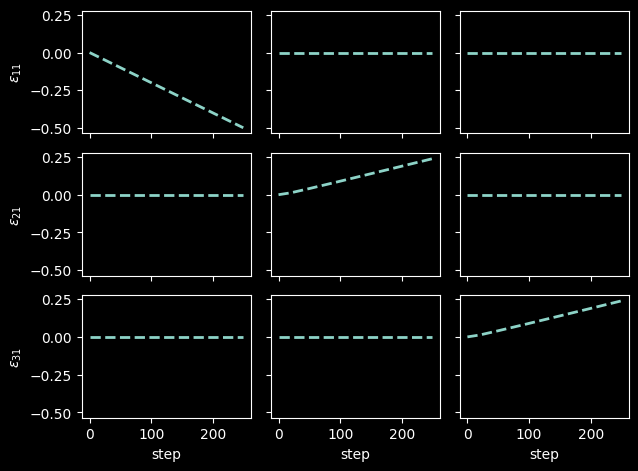

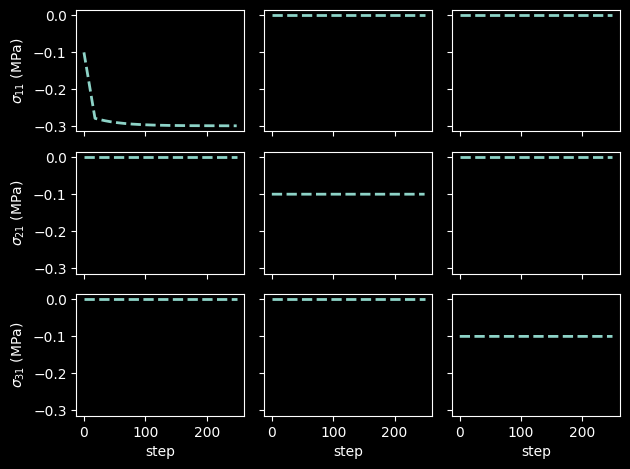

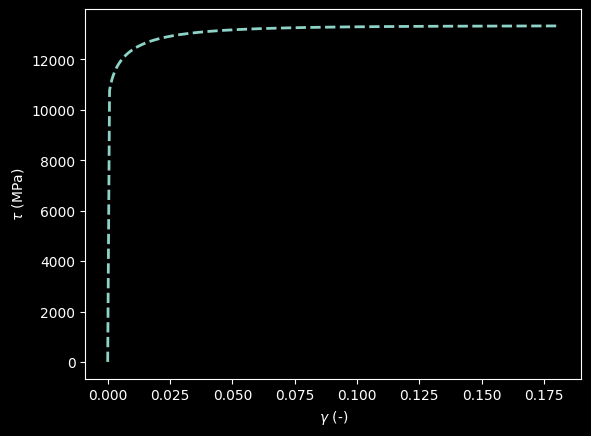

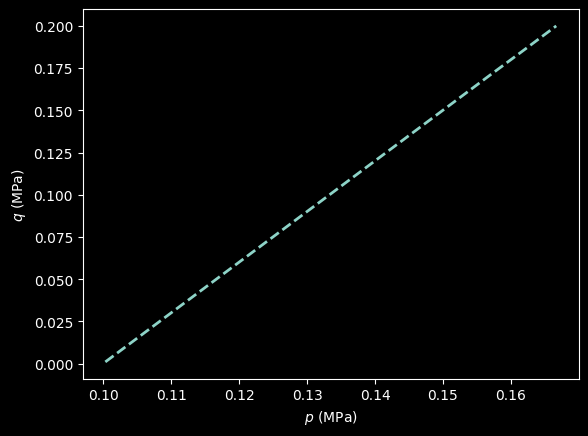

In [86]:
pm.plot_strain_grid(
    strain_list,
    plot_options={"linewidth":2.0,"ls":"--"}
)

pm.plot_stress_grid(
    stress_list,
    plot_options={"linewidth":2.0,"ls":"--"}
)
pm.plot_tau_gamma(
    stress_list,
    strain_list,
    plot_options={"linewidth":2.0,"ls":"--"}
)

pm.plot_q_p(
    stress_list,
    plot_options={"linewidth":2.0,"ls":"--"}
    )


In [87]:
pressure_list = -(1 / 3.0) * (
        stress_list.at[:, 0, 0].get() + stress_list.at[:, 1, 1].get() + stress_list.at[:, 1, 1].get()
)

In [88]:
dev_stress_list = stress_list + jnp.identity(3) * pressure_list.reshape(-1, 1, 1)

In [89]:
q_vm_list = jnp.array(
    list(
        map(
            lambda s: jnp.sqrt(3 * 0.5 * jnp.trace(s @ s.T)),
            dev_stress_list,
        ),
    ),
)

In [90]:
(q_vm_list[1]-q_vm_list[0])/(pressure_list[1]-pressure_list[0])

Array(3.003276, dtype=float32)

In [91]:
1/3

0.3333333333333333